# BitForecast 💰📈

## Getting data

Using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

## Importing time series with pandas

In [1]:
# Import with pandas
import pandas as pd 
# Read Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

Typically deep learning models usually performs better on lots of samples.

A smaller number of samples is something you'll often run into with time series data problems.

> **NOTE:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


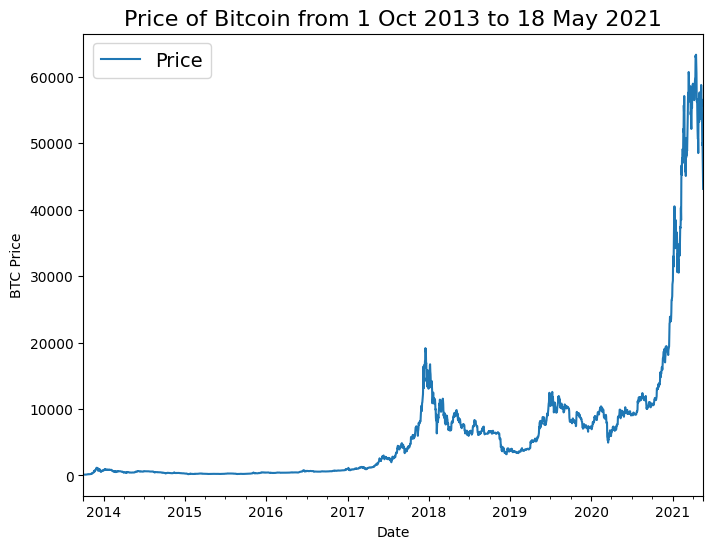

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(8, 6))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this skips all of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

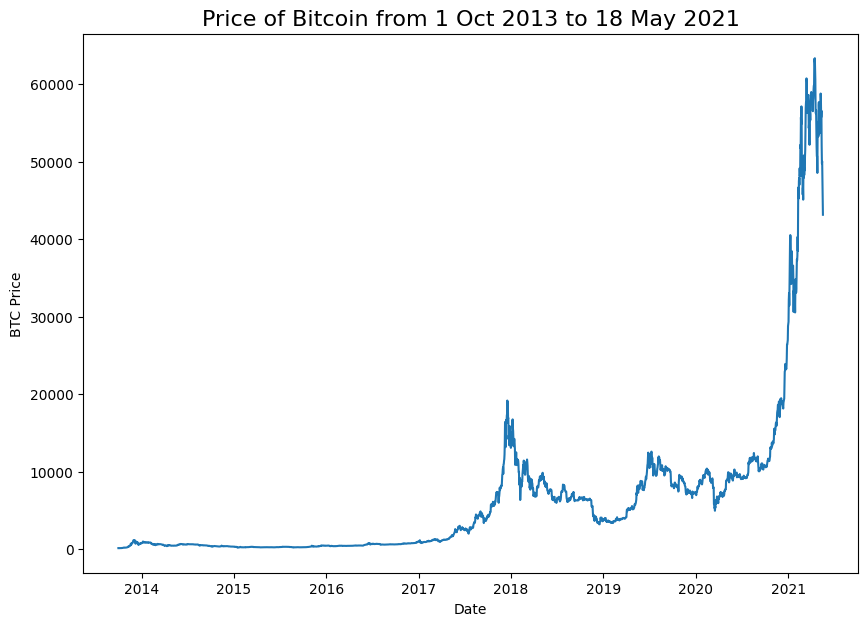

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (NOT RECOMMENDED)

In [9]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Method 1 to make train/test sets for time series data (NOT RECOMMENDED)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

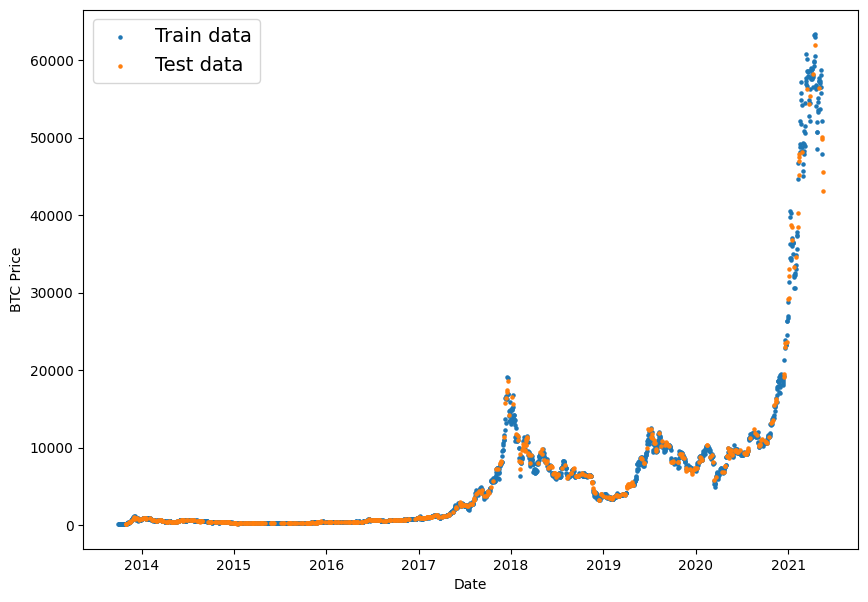

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

**NOTE:** The below method is always recommended to be used during the time series data analysis. Since, the above method using the sklearn train and test split will split the data randomly which will lead to data from (pseudo) future leaks into past and we need the data in a way such that we will predict the future value of the bitcoin, hence we need to split the data manually.

### Create train & test sets for time series (RECOMMENDED)

In [13]:
# Create train and test splits the correct way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test (can be changed as per needed)

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

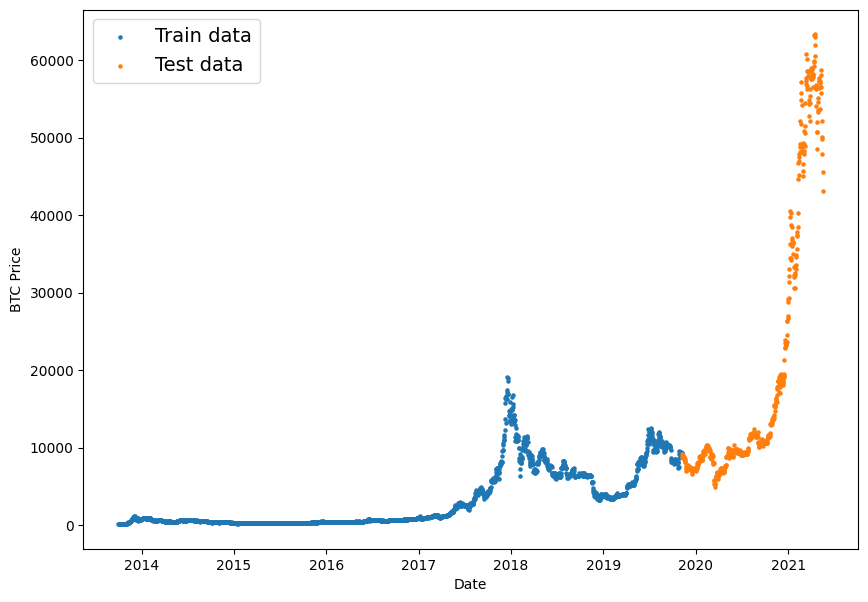

In [14]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

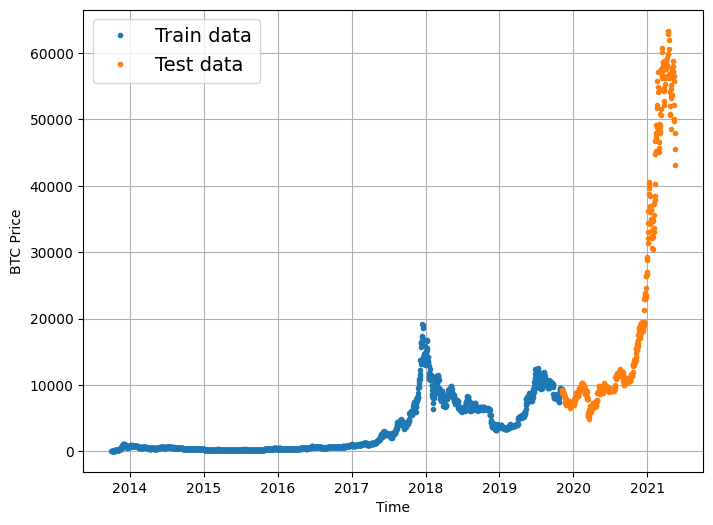

In [16]:
# Test out plotting function
plt.figure(figsize=(8, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We have got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

**IMPORTANT TERMS:**
* **Window size** = number of timesteps we're going to use to predict **horizon**
* **Horizon** = number of timesteps into the future we're going to predict

Modelling experiments, We will build:
* Model 0 - Naive model (baseline)	
* Model 1 - Dense model, window = 7, horizon = 1
* Model 2 - Same as 1, 	window = 30, horizon = 1
* Model 3 - Same as 1, 	window = 30, horizon = 7
* Model 4 - Conv1D, window = 7, horizon = 1
* Model 5 - LSTM, window = 7, horizon = 1
* Model 6 - Same as 1 Dense model (but with multivariate data), window = 7, horizon = 1
* Model 7 - N-BEATs Algorithm, window = 7, horizon = 1
* Model 8 - Ensemble (multiple models optimized on different loss functions), window = 7, horizon = 1
* Model 9 - Future prediction model (model to predict future values), window = 7, horizon = 1
* Model 10 - Same as 1 (but with turkey data introduced), window = 7, horizon = 1

## Model 0: Naive forecast (baseline)

The formula looks like this:
$$\hat{y}_{t} = y_{t-1}$$
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
# Test Set Prices of Bitcoin
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [18]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

# NOTE: Since, in the naive forecast model predicts the future forecast as from the previous forecast  y(t) = y(t-1) 
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [19]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

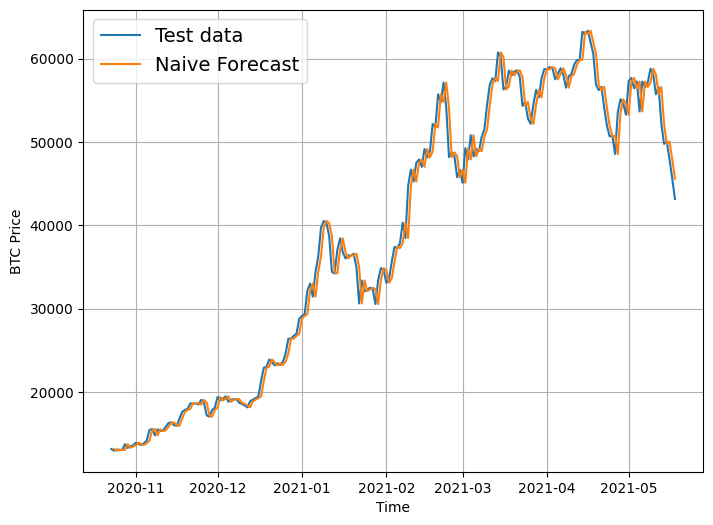

In [20]:
# Plot naive forecast
plt.figure(figsize=(8, 6))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Some evaluation metrics for time series forecasting. 

Since, we are predicting a number, so that means we have a form of a regression problem.

Because we are working on a regression problem, we will require some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The important thing evaluating here is: **how do model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

> **IMPORTANT RESOURCE:** For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) 

In [21]:
import tensorflow as tf

In [22]:
# MASE implementation
# A scaled error is >1 if the forecast is worse than the naive and <1 if the forecast is better than the naive.
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [23]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

### Evaluation function with various metrics

In [24]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations with TensorFlow)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [26]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [27]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [28]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

* Moving average - https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* ARIMA (Autoregression Integrated Moving Average) - https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* sktime (Scikit-Learn for time series) - https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees) - https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) - https://github.com/facebookresearch/Kats
* LinkedIn Greykite (flexible, intuitive and fast forecasts) - https://github.com/linkedin/greykite

## Format Data Part 2: Windowing our dataset

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [29]:
# What we want to do with our Bitcoin data
# We will use the past 7 days of data to predict the price of Bitcoin on the next day
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
# Setup GLOBAL VARIABLES for window and horizon size
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction
HORIZON = 1 # predict next 1 day

In [31]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [32]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have build a function to label our windowed data. However, this only works on a small scale. Thus, it won't work across the entire time series dataset. We can use the Python for loops, but for large time series, that will be quite slow.

* To speed up, we will use NumPy's array indexing: https://numpy.org/doc/stable/reference/arrays.indexing.html.

Thus, the function created will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example: 
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
1. Uses the 2D array of multiple window steps (from step 2) to index on a target series (e.g. the historical price of Bitcoin)
2. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon. 

> **IMPORTANT RESOURCE:** The function has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [33]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(window_step)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  # create 2D array of windows of size window_size
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [34]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

In [37]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [39]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [42]:
train_labels[:-HORIZON-1]

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9369.62808116],
       [9326.59962378],
       [9335.75240233]])

In [43]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating modelling checkpoint callback

We will compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [44]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

First deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128
* 100 epochs 

- **Hyperparameters** = values a machine learning practitioner can adjust themselves
- **Parameters** = values a model learns on its own

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100


 1/18 [>.............................] - ETA: 14s - loss: 3905.1687 - mae: 3905.1687 - mse: 31459876.0000

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 2s 81ms/step - loss: 1583.7649 - mae: 1583.7649 - mse: 9046744.0000 - val_loss: 3543.0496 - val_mae: 3543.0496 - val_mse: 28656590.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 538.5396 - mae: 538.5396 - mse: 1285814.6250

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 431.6360 - mae: 431.6360 - mse: 744812.0000 - val_loss: 1828.5579 - val_mae: 1828.5579 - val_mse: 8392852.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 238.3524 - mae: 238.3524 - mse: 208335.5625

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 245.0373 - mae: 245.0373 - mse: 287851.4688 - val_loss: 1395.8854 - val_mae: 1395.8854 - val_mse: 5489816.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 279.2197 - mae: 279.2197 - mse: 305867.3750

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 40ms/step - loss: 218.9737 - mae: 218.9737 - mse: 242877.3281 - val_loss: 1152.7400 - val_mae: 1152.7400 - val_mse: 4327844.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 203.1488 - mae: 203.1488 - mse: 146218.4062

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 39ms/step - loss: 205.1153 - mae: 205.1153 - mse: 218033.4688 - val_loss: 1091.9249 - val_mae: 1091.9249 - val_mse: 3946197.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 153.1023 - mae: 153.1023 - mse: 88624.1328

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 198.3664 - mae: 198.3664 - mse: 201073.6094 - val_loss: 1055.0192 - val_mae: 1055.0192 - val_mse: 3699322.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.6178 - mae: 231.6178 - mse: 384349.4062

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 187.5310 - mae: 187.5310 - mse: 184237.6250 - val_loss: 1030.5142 - val_mae: 1030.5142 - val_mse: 3434361.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 162.7986 - mae: 162.7986 - mse: 102294.4375

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 60ms/step - loss: 179.5143 - mae: 179.5143 - mse: 171551.2500 - val_loss: 988.3152 - val_mae: 988.3152 - val_mse: 3171177.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 144.8226 - mae: 144.8226 - mse: 96971.0312

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 174.2892 - mae: 174.2892 - mse: 160793.7031 - val_loss: 937.3796 - val_mae: 937.3796 - val_mse: 2945063.2500
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 171.1467 - mae: 171.1467 - mse: 155171.6250

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 172.3893 - mae: 172.3893 - mse: 156204.7500 - val_loss: 899.2272 - val_mae: 899.2272 - val_mse: 2647357.7500
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 160.5000 - mae: 160.5000 - mse: 138755.6250 - val_loss: 901.8391 - val_mae: 901.8391 - val_mse: 2502372.2500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 152.4559 - mae: 152.4559 - mse: 128394.2891 - val_loss: 951.6331 - val_mae: 951.6331 - val_mse: 2567346.5000
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 156.3618 - mae: 156.3618 - mse: 127837.4688 - val_loss: 921.0280 - val_mae: 921.0280 - val_mse: 2417723.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 163.4160 - mae: 163.4160 - mse: 118874.0781

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 146.1718 - mae: 146.1718 - mse: 116950.3203 - val_loss: 781.7606 - val_mae: 781.7606 - val_mse: 1975935.1250
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 150.8088 - mae: 150.8088 - mse: 115950.4688 - val_loss: 783.5343 - val_mae: 783.5343 - val_mse: 1929232.3750
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 124.0776 - mae: 124.0776 - mse: 66405.7734

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 137.5509 - mae: 137.5509 - mse: 103077.0703 - val_loss: 738.5544 - val_mae: 738.5544 - val_mse: 1796975.5000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 133.7647 - mae: 133.7647 - mse: 102071.1016 - val_loss: 793.2723 - val_mae: 793.2723 - val_mse: 1892701.3750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1973 - mae: 151.1973 - mse: 116244.9531

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 63ms/step - loss: 132.6851 - mae: 132.6851 - mse: 98708.9844 - val_loss: 703.4513 - val_mae: 703.4513 - val_mse: 1670885.1250
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6982 - mae: 130.6982 - mse: 96863.1953 - val_loss: 733.1510 - val_mae: 733.1510 - val_mse: 1688719.3750
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 139.7841 - mae: 139.7841 - mse: 106801.3906

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 126.5578 - mae: 126.5578 - mse: 92450.5312 - val_loss: 683.4286 - val_mae: 683.4286 - val_mse: 1594822.8750
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 130.2415 - mae: 130.2415 - mse: 94808.1562 - val_loss: 689.1207 - val_mae: 689.1207 - val_mse: 1615645.5000
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 128.7935 - mae: 128.7935 - mse: 93155.8672 - val_loss: 724.7247 - val_mae: 724.7247 - val_mse: 1625545.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 129.0275 - mae: 129.0275 - mse: 69209.0625

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 127.0886 - mae: 127.0886 - mse: 88883.4688 - val_loss: 661.4384 - val_mae: 661.4384 - val_mse: 1507393.6250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3846 - mae: 139.3846 - mse: 101723.0156

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 124.7364 - mae: 124.7364 - mse: 89550.5859 - val_loss: 660.0566 - val_mae: 660.0566 - val_mse: 1457902.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1071 - mae: 138.1071 - mse: 77434.0156

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 120.8481 - mae: 120.8481 - mse: 85670.9688 - val_loss: 647.0027 - val_mae: 647.0027 - val_mse: 1449733.2500
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 122.0790 - mae: 122.0790 - mse: 86024.3594 - val_loss: 654.9255 - val_mae: 654.9255 - val_mse: 1430738.0000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 122.5821 - mae: 122.5821 - mse: 83563.9453 - val_loss: 654.1356 - val_mae: 654.1356 - val_mse: 1467113.6250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 121.2673 - mae: 121.2673 - mse: 73430.1953

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 122.4136 - mae: 122.4136 - mse: 83947.4688 - val_loss: 636.0422 - val_mae: 636.0422 - val_mse: 1375716.6250
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3072 - mae: 116.3072 - mse: 80508.1328 - val_loss: 647.6367 - val_mae: 647.6367 - val_mse: 1396860.7500
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3057 - mae: 134.3057 - mse: 93148.2266

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 61ms/step - loss: 127.9040 - mae: 127.9040 - mse: 86665.5312 - val_loss: 625.9825 - val_mae: 625.9825 - val_mse: 1364839.3750
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8774 - mae: 124.8774 - mse: 63647.7539

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 49ms/step - loss: 115.9192 - mae: 115.9192 - mse: 78807.7500 - val_loss: 616.4294 - val_mae: 616.4294 - val_mse: 1325989.7500
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0429 - mae: 119.0429 - mse: 81863.1406

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 47ms/step - loss: 118.8035 - mae: 118.8035 - mse: 81247.2656 - val_loss: 615.2643 - val_mae: 615.2643 - val_mse: 1327249.5000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6920 - mae: 119.6920 - mse: 81995.2422 - val_loss: 662.3726 - val_mae: 662.3726 - val_mse: 1412693.6250
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2344 - mae: 116.2344 - mse: 80404.9062 - val_loss: 629.5607 - val_mae: 629.5607 - val_mse: 1365934.2500
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1511 - mae: 114.1511 - mse: 78148.3516 - val_loss: 630.7579 - val_mae: 630.7579 - val_mse: 1367072.6250
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 160.3764 - mae: 160.3764 - mse: 148535.2188

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 116.6391 - mae: 116.6391 - mse: 77827.3438 - val_loss: 611.7708 - val_mae: 611.7708 - val_mse: 1312084.5000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3312 - mae: 113.3312 - mse: 77097.2656 - val_loss: 623.7020 - val_mae: 623.7020 - val_mse: 1314520.0000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.9760 - mae: 101.9760 - mse: 66455.5469

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 113.9611 - mae: 113.9611 - mse: 77248.9297 - val_loss: 602.1050 - val_mae: 602.1050 - val_mse: 1283668.1250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 124.0828 - mae: 124.0828 - mse: 105707.9219

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 112.8751 - mae: 112.8751 - mse: 76543.2344 - val_loss: 598.2000 - val_mae: 598.2000 - val_mse: 1268863.2500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7145 - mae: 111.7145 - mse: 74859.0000 - val_loss: 600.7310 - val_mae: 600.7310 - val_mse: 1280376.3750
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4357 - mae: 112.4357 - mse: 75474.9609 - val_loss: 613.5192 - val_mae: 613.5192 - val_mse: 1310216.2500
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1359 - mae: 117.1359 - mse: 78672.9453 - val_loss: 721.2545 - val_mae: 721.2545 - val_mse: 1535928.8750
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 123.2744 - mae: 123.2744 - mse: 77983.6328 - val_loss: 780.0125 - val_mae: 780.0125 - val_mse: 1801342.3750
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 119.9931 - mae: 119.9931 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 112.2901 - mae: 112.2901 - mse: 75025.1562 - val_loss: 594.7710 - val_mae: 594.7710 - val_mse: 1257135.6250
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 83.1631 - mae: 83.1631 - mse: 45144.3984

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 112.4176 - mae: 112.4176 - mse: 73700.8438 - val_loss: 586.6479 - val_mae: 586.6479 - val_mse: 1232660.0000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0275 - mae: 112.0275 - mse: 74778.2734 - val_loss: 616.6181 - val_mae: 616.6181 - val_mse: 1274557.7500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7487 - mae: 112.7487 - mse: 75228.2266 - val_loss: 673.1007 - val_mae: 673.1007 - val_mse: 1395940.5000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 121.8150 - mae: 121.8150 - mse: 78898.8828 - val_loss: 636.2693 - val_mae: 636.2693 - val_mse: 1350926.5000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7584 - mae: 112.7584 - mse: 73601.2031 - val_loss: 686.9731 - val_mae: 686.9731 - val_mse: 1485648.5000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9805 - mae: 115.9805 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 39ms/step - loss: 113.8132 - mae: 113.8132 - mse: 74330.9141 - val_loss: 583.8832 - val_mae: 583.8832 - val_mse: 1213097.6250
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9546 - mae: 109.9546 - mse: 72492.6953 - val_loss: 607.6324 - val_mae: 607.6324 - val_mse: 1250322.8750
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0605 - mae: 111.0605 - mse: 73418.7656 - val_loss: 622.8743 - val_mae: 622.8743 - val_mse: 1279670.5000
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9959 - mae: 111.9959 - mse: 71494.0156 - val_loss: 833.5466 - val_mae: 833.5466 - val_mse: 1970954.6250
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0850 - mae: 117.0850 - mse: 77331.8594 - val_loss: 611.5190 - val_mae: 611.5190 - val_mse: 1253888.7500
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8759 - mae: 103.8759 - mse: 

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 39ms/step - loss: 108.2760 - mae: 108.2760 - mse: 70872.1406 - val_loss: 582.1489 - val_mae: 582.1489 - val_mse: 1201523.6250
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4353 - mae: 109.4353 - mse: 72148.1484 - val_loss: 643.6381 - val_mae: 643.6381 - val_mse: 1352210.3750
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1219 - mae: 114.1219 - mse: 75479.1094 - val_loss: 673.8179 - val_mae: 673.8179 - val_mse: 1390586.6250
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 145.5394 - mae: 145.5394 - mse: 98862.2969

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 109.0647 - mae: 109.0647 - mse: 70684.0547 - val_loss: 580.5154 - val_mae: 580.5154 - val_mse: 1210333.2500
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2490 - mae: 108.2490 - mse: 70504.0703 - val_loss: 590.5160 - val_mae: 590.5160 - val_mse: 1232712.7500
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 90.0713 - mae: 90.0713 - mse: 78146.4766

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 109.9158 - mae: 109.9158 - mse: 71594.8672 - val_loss: 577.3841 - val_mae: 577.3841 - val_mse: 1197302.6250
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4750 - mae: 109.4750 - mse: 71273.8672 - val_loss: 647.3220 - val_mae: 647.3220 - val_mse: 1326048.2500
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8218 - mae: 112.8218 - mse: 74509.1641 - val_loss: 606.8035 - val_mae: 606.8035 - val_mse: 1262983.7500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5535 - mae: 116.5535 - mse: 73641.7031

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 40ms/step - loss: 109.8770 - mae: 109.8770 - mse: 71774.3359 - val_loss: 575.1066 - val_mae: 575.1066 - val_mse: 1191532.8750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2228 - mae: 107.2228 - mse: 69182.2422 - val_loss: 586.0662 - val_mae: 586.0662 - val_mse: 1222195.1250
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7530 - mae: 114.7530 - mse: 71071.2812 - val_loss: 676.7692 - val_mae: 676.7692 - val_mse: 1441228.3750
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 117.5345 - mae: 117.5345 - mse: 74152.6328 - val_loss: 716.1202 - val_mae: 716.1202 - val_mse: 1495197.3750
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 126.6326 - mae: 126.6326 - mse: 79857.6719 - val_loss: 579.4337 - val_mae: 579.4337 - val_mse: 1204038.2500
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2561 - mae: 110.2561 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 112.6976 - mae: 112.6976 - mse: 71725.6016 - val_loss: 573.9485 - val_mae: 573.9485 - val_mse: 1185095.0000
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0547 - mae: 111.0547 - mse: 72280.5859 - val_loss: 603.6749 - val_mae: 603.6749 - val_mse: 1246214.1250
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 132.9583 - mae: 132.9583 - mse: 72937.7188

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 111.9201 - mae: 111.9201 - mse: 71598.5859 - val_loss: 571.4524 - val_mae: 571.4524 - val_mse: 1179687.1250
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3147 - mae: 111.3147 - mse: 71174.8984 - val_loss: 585.7247 - val_mae: 585.7247 - val_mse: 1200126.5000
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9088 - mae: 110.9088 - mse: 72041.6719 - val_loss: 601.0629 - val_mae: 601.0629 - val_mse: 1223869.8750
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4310 - mae: 114.4310 - mse: 71544.0391 - val_loss: 606.1213 - val_mae: 606.1213 - val_mse: 1256985.1250
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7019 - mae: 111.7019 - mse: 74539.6797 - val_loss: 588.9930 - val_mae: 588.9930 - val_mse: 1221298.0000
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8216 - mae: 107.8216 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 106.4721 - mae: 106.4721 - mse: 68849.8672 - val_loss: 570.5749 - val_mae: 570.5749 - val_mse: 1173026.2500
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3870 - mae: 113.3870 - mse: 60472.4414

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 105.2644 - mae: 105.2644 - mse: 68373.5312 - val_loss: 570.3430 - val_mae: 570.3430 - val_mse: 1171550.6250
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 145.5364 - mae: 145.5364 - mse: 115699.7500

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 39ms/step - loss: 109.6960 - mae: 109.6960 - mse: 71292.0234 - val_loss: 568.1571 - val_mae: 568.1571 - val_mse: 1164299.8750
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 124.2984 - mae: 124.2984 - mse: 75588.0000 - val_loss: 781.8805 - val_mae: 781.8805 - val_mse: 1686028.2500


In [46]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 781.8805 - mae: 781.8805 - mse: 1686028.3750


[781.8804931640625, 781.8804931640625, 1686028.375]

In [47]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.1572 - mae: 568.1572 - mse: 1164299.7500


[568.1571655273438, 568.1571655273438, 1164299.75]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future):

Writing a function to make predictions:
1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions 

In [48]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [49]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8866.947, 8772.68 , 9049.948, 8805.244, 8732.591, 8762.186,
        8694.73 , 8520.873, 8474.951, 8537.424], dtype=float32)>)

In [50]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [51]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.15704,
 'mse': 1164299.5,
 'rmse': 1079.0271,
 'mape': 2.5583704,
 'mase': 0.99809456}

In [52]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

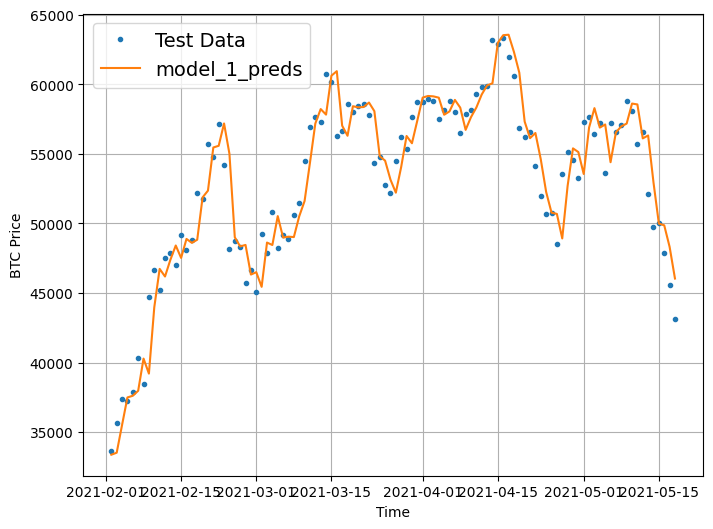

In [53]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(8, 6))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [54]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [55]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [56]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [57]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON),
], name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


In [58]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 599.8890


599.8889770507812

In [59]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.8890


599.8889770507812

In [60]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 941us/step


In [61]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [62]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 599.8888,
 'mse': 1263615.1,
 'rmse': 1124.1063,
 'mape': 2.7538567,
 'mase': 1.0486115}

In [63]:
model_1_results

{'mae': 568.15704,
 'mse': 1164299.5,
 'rmse': 1079.0271,
 'mape': 2.5583704,
 'mase': 0.99809456}

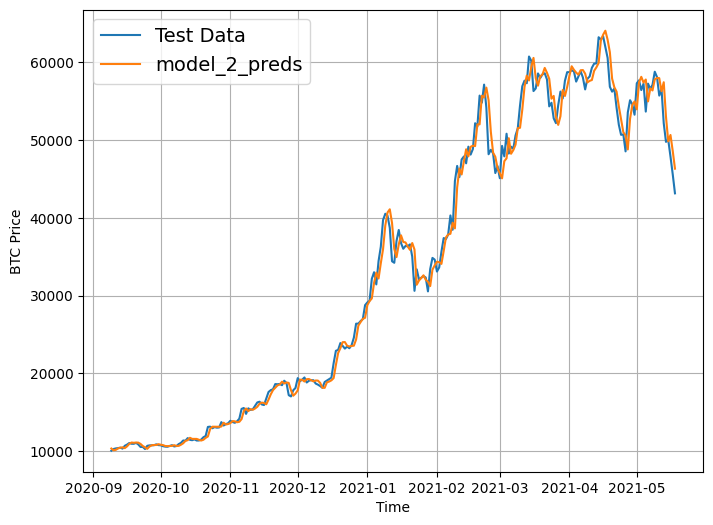

In [64]:
offset = 300
plt.figure(figsize=(8, 6))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [65]:
HORIZON = 7
WINDOW_SIZE = 30

In [66]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [67]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [69]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile the model
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


In [70]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 823us/step - loss: 1358.7316


1358.7315673828125

In [71]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1232.3104


1232.3104248046875

In [72]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9288.102 , 9446.658 , 9183.6045, 9530.627 , 9588.614 , 9488.402 ,
        9528.627 ],
       [9168.885 , 9098.927 , 8925.196 , 9310.519 , 9395.048 , 9444.194 ,
        9532.695 ],
       [8905.479 , 8958.944 , 8888.48  , 8948.07  , 9041.829 , 9248.334 ,
        9413.0205],
       [8865.971 , 8937.055 , 9085.466 , 8904.532 , 9118.027 , 9211.982 ,
        9322.169 ],
       [8789.492 , 8963.628 , 8867.304 , 8969.192 , 9104.202 , 9169.025 ,
        9095.366 ]], dtype=float32)>

In [73]:
model_2_results

{'mae': 599.8888,
 'mse': 1263615.1,
 'rmse': 1124.1063,
 'mape': 2.7538567,
 'mase': 1.0486115}

In [74]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [75]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  643.16144 ,   516.66766 ,   403.65207 ,   437.0057  ,
          439.6822  ,   553.9279  ,   648.1798  ,   556.57697 ,
          436.56732 ,   617.3086  ,   847.81146 ,   972.91547 ,
          943.03656 ,   883.1405  ,   537.0296  ,   234.85875 ,
          154.34012 ,   230.47678 ,   213.20012 ,   272.52155 ,
          218.89983 ,   227.51736 ,   362.99448 ,   325.01654 ,
          188.68555 ,    96.67327 ,   116.59005 ,   147.38547 ,
          172.73723 ,   150.43443 ,   292.2022  ,   376.28488 ,
          390.15018 ,   371.67935 ,   289.7361  ,   303.45236 ,
          311.40234 ,   255.54137 ,   231.54771 ,   236.76793 ,
          358.196   ,    84.87305 ,   119.78906 ,   101.88163 ,
          151.4467  ,   158.31557 ,    66.83363 ,    66.87919 ,
          105.434364,   124.55134 ,   144.1843  ,   144.2401  ,
          181.16301 ,   226.49951 ,   222.50084 ,   343.81445 ,
          478.1008  ,   575.8743  ,   490.05377 ,   475.6264  ,
          342.74442 ,   256.73688

**NOTE:** The above model_3 prediction will result into many values since we are predicting more than one value i.e. we are predicting values for the next seven timesteps. Thus, we need to adjust our evaluation function to work with larger horizon size.

## Make our evaluation function work for larger horizons

In [76]:
model_2_results["mae"].ndim

0

In [77]:
model_3_results["mae"].ndim

1

In [78]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1232.3104


1232.3104248046875

In [79]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1232.3105

In [80]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [81]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1232.3105,
 'mse': 5341542.5,
 'rmse': 1412.497,
 'mape': 5.5579987,
 'mase': 2.1928272}

In [82]:
model_2_results

{'mae': 599.8888,
 'mse': 1263615.1,
 'rmse': 1124.1063,
 'mape': 2.7538567,
 'mase': 1.0486115}

We've made and evaluated predictions with `model_3`. Now, Visualize Model_3.

In [83]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9288.102 , 9446.658 , 9183.6045, 9530.627 , 9588.614 , 9488.402 ,
        9528.627 ],
       [9168.885 , 9098.927 , 8925.196 , 9310.519 , 9395.048 , 9444.194 ,
        9532.695 ],
       [8905.479 , 8958.944 , 8888.48  , 8948.07  , 9041.829 , 9248.334 ,
        9413.0205],
       [8865.971 , 8937.055 , 9085.466 , 8904.532 , 9118.027 , 9211.982 ,
        9322.169 ],
       [8789.492 , 8963.628 , 8867.304 , 8969.192 , 9104.202 , 9169.025 ,
        9095.366 ]], dtype=float32)>

In [84]:
test_labels[:5]

array([[8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
        8760.89271814, 8749.52059102, 8656.97092235],
       [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102, 8656.97092235, 8500.64355816],
       [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
        8656.97092235, 8500.64355816, 8469.2608989 ],
       [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 , 8537.33965197],
       [8760.89271814, 8749.52059102, 8656.97092235, 8500.64355816,
        8469.2608989 , 8537.33965197, 8205.80636599]])

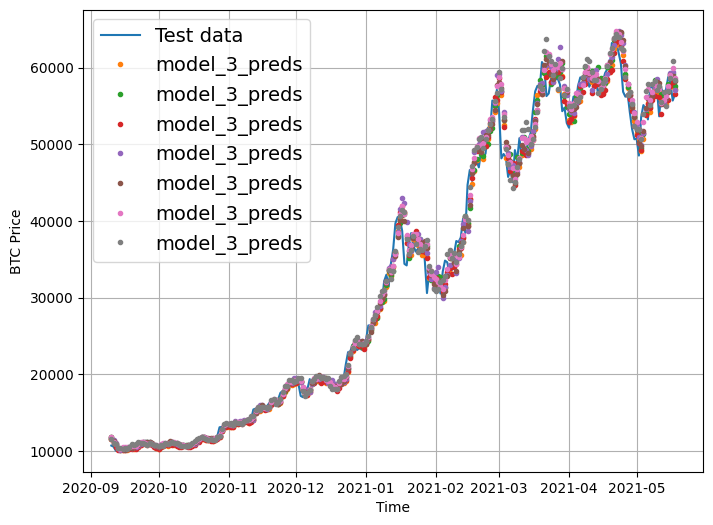

In [85]:
offset = 300
plt.figure(figsize=(8, 6))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [86]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9288.102 , 9446.658 , 9183.6045, 9530.627 , 9588.614 , 9488.402 ,
       9528.627 ], dtype=float32)>

In [87]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9436.376>

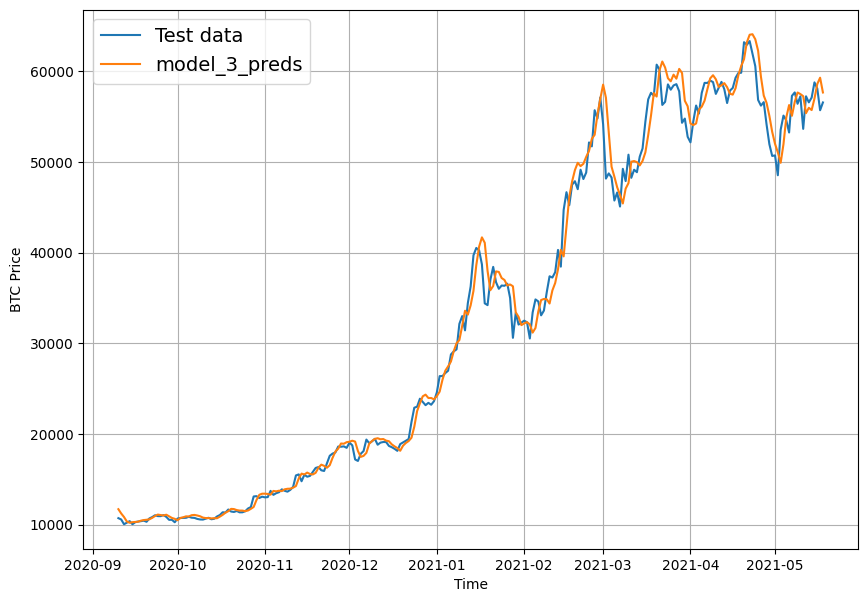

In [88]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

## Which of our models trained so far is performing the best? 

Since, We have trained a few models, now we will compare them. 

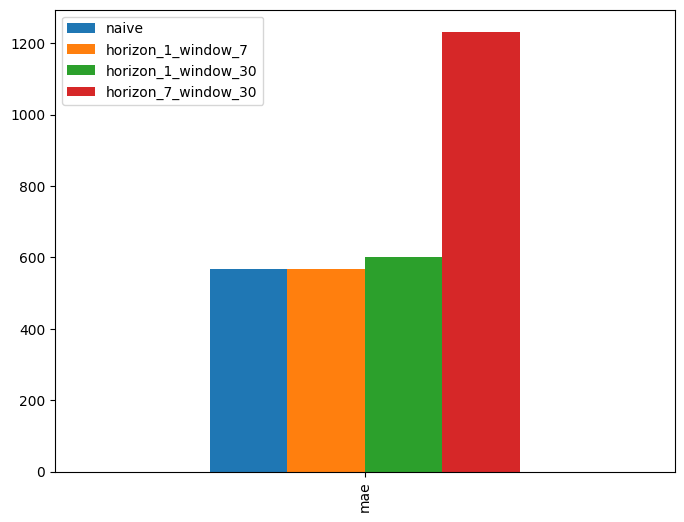

In [89]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(8, 6), kind="bar");

> **NOTE:** You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naive model will often get fairly good results.

> **RESOURCE:** For more on how autocorrelation influences a model's predictions, see the article [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424).

## Model 4: Conv1D

In [90]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [91]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [92]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However the data isn't in that shape yet..

In [93]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [94]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [95]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [96]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [97]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 11s - loss: 3962.2231

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 3s 112ms/step - loss: 2129.8413 - val_loss: 3325.1597
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 388.2412

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 63ms/step - loss: 313.1040 - val_loss: 1217.2578
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 159.9861

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 207.6053 - val_loss: 966.4816
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 220.9247

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 175.0060 - val_loss: 956.5153
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 171.7642 - val_loss: 959.9649
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1815

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 168.1559 - val_loss: 938.4528
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 211.2303

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 166.2169 - val_loss: 925.4086
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 140.2079

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 77ms/step - loss: 164.1674 - val_loss: 911.9579
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 163.1807 - val_loss: 933.2242
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 175.8849

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 160.6771 - val_loss: 895.2217
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 169.6774

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 158.4225 - val_loss: 875.2086
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 156.1185 - val_loss: 911.7204
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 120.0377

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 154.7681 - val_loss: 873.4065
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 162.7753

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 152.8477 - val_loss: 861.7422
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 150.8053

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 94ms/step - loss: 150.6769 - val_loss: 845.0252
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 135.3936

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 147.7496 - val_loss: 821.0234
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 139.6760

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 146.8043 - val_loss: 813.2192
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2577 - val_loss: 820.3237
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 83.3391

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 141.8273 - val_loss: 793.2620
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 142.1501 - val_loss: 808.5590
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 202.9607

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 57ms/step - loss: 140.8229 - val_loss: 762.7427
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 137.9583

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 97ms/step - loss: 137.9583 - val_loss: 759.4265
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7734

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 135.1083 - val_loss: 754.7665
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 149.7290

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 136.0277 - val_loss: 742.0325
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 137.3722 - val_loss: 743.9435
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7885

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 130.8958 - val_loss: 721.2123
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 185.5865

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 130.1350 - val_loss: 718.3823
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7675

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 77ms/step - loss: 128.5408 - val_loss: 705.8459
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 126.9783 - val_loss: 709.1883
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 131.0745 - val_loss: 790.2141
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 138.1585 - val_loss: 816.6458
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4425

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 135.0145 - val_loss: 690.4293
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 152.6077

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 127.4524 - val_loss: 685.5425
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 136.3882

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 123.0074 - val_loss: 666.8847
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 112.8587

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 121.7655 - val_loss: 663.3334
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2317 - val_loss: 725.0936
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 157.3018

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 122.2753 - val_loss: 654.6346
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1529 - val_loss: 658.3246
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 121.9804 - val_loss: 673.5298
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3310 - val_loss: 656.6954
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 109.0446

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 119.8039 - val_loss: 635.7706
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3597

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 122.2491 - val_loss: 631.8169
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4269 - val_loss: 633.2435
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 69.0482

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 118.1656 - val_loss: 625.4554
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5852 - val_loss: 629.0923
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 90.9585

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 117.6445 - val_loss: 619.5680
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 122.3873 - val_loss: 688.2703
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1174 - val_loss: 673.4573
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 172.9070

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 77ms/step - loss: 116.9079 - val_loss: 613.1219
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9221 - val_loss: 614.1995
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4712 - val_loss: 616.4208
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7170

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 116.2965 - val_loss: 612.3510
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0319 - val_loss: 620.1915
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0433 - val_loss: 668.9757
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 139.6702

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 116.6265 - val_loss: 605.2889
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4533 - val_loss: 767.8786
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 130.7358 - val_loss: 675.4252
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 121.3709 - val_loss: 647.1467
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 78.8599

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 112.0417 - val_loss: 603.2879
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3837 - val_loss: 622.0709
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5897

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 112.9419 - val_loss: 599.7440
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 78.6668

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 58ms/step - loss: 110.4786 - val_loss: 599.6633
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9221 - val_loss: 602.5643
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7879 - val_loss: 653.5259
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5175 - val_loss: 609.2575
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1119

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 112.0408 - val_loss: 591.4799
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5252 - val_loss: 652.2877
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1892 - val_loss: 711.4006
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.8228 - val_loss: 685.0621
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6109

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 122.5911 - val_loss: 590.6417
Epoch 71/100
17/18 [===========================>..] - ETA: 0s - loss: 110.4096

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 111.2699 - val_loss: 587.9788
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 108.8024

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 94ms/step - loss: 110.7159 - val_loss: 583.0356
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3776 - val_loss: 604.2629
Epoch 74/100
13/18 [====================>.........] - ETA: 0s - loss: 110.6705

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 110.2620 - val_loss: 580.7222
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4113 - val_loss: 582.7709
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 78.2362

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 109.8668 - val_loss: 580.4777
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4227 - val_loss: 581.3721
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 109.0606

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 109.3678 - val_loss: 580.0781
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8531 - val_loss: 596.4427
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9937 - val_loss: 583.3882
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 108.4356

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 96ms/step - loss: 108.4356 - val_loss: 578.6404
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0653 - val_loss: 580.3394
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5350 - val_loss: 660.1487
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 115.4436 - val_loss: 584.0932
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7602 - val_loss: 586.4116
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9172 - val_loss: 635.3008
Epoch 87/100
16/18 [=========================>....] - ETA: 0s - loss: 108.9741

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 109.8570 - val_loss: 571.9340
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1795 - val_loss: 606.8065
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4776 - val_loss: 578.4968
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0437 - val_loss: 632.5726
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9567 - val_loss: 595.4792
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2943 - val_loss: 588.3129
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4954 - val_loss: 640.8936
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2238 - val_loss: 587.9636
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4707

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 107.8133 - val_loss: 569.3063
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 116.9985 - val_loss: 614.7139
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5491 - val_loss: 610.1304
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7196 - val_loss: 571.3221
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3928 - val_loss: 588.1584
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8448 - val_loss: 658.1101


In [98]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Evaluate model_4 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 658.1100


658.1100463867188

In [100]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 569.3063


569.3062744140625

In [101]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 941us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8889.936, 8780.492, 9003.995, 8792.072, 8731.236, 8742.876,
       8682.486, 8537.677, 8457.015, 8521.106], dtype=float32)>

In [102]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.30634,
 'mse': 1183255.9,
 'rmse': 1087.7756,
 'mape': 2.5527563,
 'mase': 1.0001136}

## Model 5: RNN (LSTM)

Building an RNN model for time series dataset.

In [103]:
tf.random.set_seed(42)

# Building an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2503.2583 

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 177ms/step - loss: 2254.4148 - val_loss: 9117.1650
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 626.1150 

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 124ms/step - loss: 495.4728 - val_loss: 1653.6263
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 234.1831

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 150ms/step - loss: 224.9362 - val_loss: 1251.5465
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 197.5238

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 197.5238 - val_loss: 1136.4075
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 204.1397

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 131ms/step - loss: 194.2233 - val_loss: 1088.1741
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 191.4556

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 191.4556 - val_loss: 1068.5441
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 209.2574

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 193.5571 - val_loss: 1059.3192
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 187.7968 - val_loss: 1071.0774
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 185.6316 - val_loss: 1064.2635
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 177.8793

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 183.7199 - val_loss: 1043.1442
Epoch 11/100
 9/18 [==============>...............] - ETA: 0s - loss: 179.4933

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 127ms/step - loss: 181.9642 - val_loss: 1016.8678
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 180.4276 - val_loss: 1019.1354
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 178.1975 - val_loss: 1018.4724
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 176.8425 - val_loss: 1054.7217
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 176.0990

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 133ms/step - loss: 174.8088 - val_loss: 975.1504
Epoch 16/100
 9/18 [==============>...............] - ETA: 0s - loss: 172.2758

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 171.2625 - val_loss: 948.8539
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 168.7730 - val_loss: 1058.7723
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 168.9175 - val_loss: 970.4965
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 169.8593

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 162.9992 - val_loss: 943.3595
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 165.9634

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 162.4071 - val_loss: 894.9113
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 159.0577 - val_loss: 913.6240
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 156.4637 - val_loss: 898.1628
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 151.0887

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 144ms/step - loss: 153.7293 - val_loss: 890.3569
Epoch 24/100
 9/18 [==============>...............] - ETA: 0s - loss: 148.6103

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 151.6495 - val_loss: 861.5833
Epoch 25/100
 9/18 [==============>...............] - ETA: 0s - loss: 158.5809

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 149.6198 - val_loss: 833.6600
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 152.0625

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 148.4694 - val_loss: 814.0137
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 151.6826

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 146.3896 - val_loss: 812.2347
Epoch 28/100
10/18 [===============>..............] - ETA: 0s - loss: 150.4767

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 149ms/step - loss: 143.2975 - val_loss: 787.2228
Epoch 29/100
10/18 [===============>..............] - ETA: 0s - loss: 145.0184

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 142.2794 - val_loss: 784.5699
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 144.5986 - val_loss: 871.1231
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 142.9890

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 124ms/step - loss: 142.1978 - val_loss: 757.7196
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 135.7473 - val_loss: 767.3911
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 135.3673

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 133.6896 - val_loss: 743.6008
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 135.6293

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 131ms/step - loss: 132.8792 - val_loss: 740.7250
Epoch 35/100
 8/18 [============>.................] - ETA: 0s - loss: 126.6102

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 110ms/step - loss: 131.1326 - val_loss: 721.7247
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 125.7106

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 113ms/step - loss: 130.7012 - val_loss: 716.6715
Epoch 37/100
 9/18 [==============>...............] - ETA: 0s - loss: 116.5022

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 186ms/step - loss: 128.2614 - val_loss: 710.1271
Epoch 38/100
 9/18 [==============>...............] - ETA: 0s - loss: 133.4031

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 128ms/step - loss: 126.8661 - val_loss: 697.5157
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 127.4368 - val_loss: 722.2313
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 127.2581 - val_loss: 700.9477
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 126.0622 - val_loss: 701.0908
Epoch 42/100
13/18 [====================>.........] - ETA: 0s - loss: 123.8572

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 124.2709 - val_loss: 684.1102
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 115.7674

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 122.7134 - val_loss: 666.7348
Epoch 44/100
 9/18 [==============>...............] - ETA: 0s - loss: 121.0306

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 137ms/step - loss: 122.4098 - val_loss: 663.4014
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 125.5569

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 157ms/step - loss: 122.1757 - val_loss: 657.6546
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 127.8478

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 134ms/step - loss: 121.7919 - val_loss: 653.2881
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 120.9271 - val_loss: 667.8761
Epoch 48/100
13/18 [====================>.........] - ETA: 0s - loss: 117.6311

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 119.9523 - val_loss: 647.6311
Epoch 49/100
10/18 [===============>..............] - ETA: 0s - loss: 126.1522

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 138ms/step - loss: 118.3954 - val_loss: 646.5286
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 123.1557 - val_loss: 678.1552
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 119.4722 - val_loss: 659.0032
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 125.4845

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 117.6486 - val_loss: 634.8436
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7111 - val_loss: 638.0511
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3483 - val_loss: 639.9296
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 122.5383

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 136ms/step - loss: 116.3902 - val_loss: 623.8384
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 120.2537 - val_loss: 639.9603
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 124.9996 - val_loss: 641.5680
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 116.0135 - val_loss: 632.1517
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 115.8543

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 121ms/step - loss: 115.7284 - val_loss: 617.0410
Epoch 60/100
10/18 [===============>..............] - ETA: 0s - loss: 117.0093

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 114.7146 - val_loss: 616.1774
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 114.9148 - val_loss: 636.5993
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6723 - val_loss: 619.8494
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1567 - val_loss: 616.5934
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 114.0361 - val_loss: 626.9774
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 117.2265

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 154ms/step - loss: 115.8224 - val_loss: 610.3597
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3489 - val_loss: 624.2506
Epoch 67/100
13/18 [====================>.........] - ETA: 0s - loss: 114.8803

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 145ms/step - loss: 114.8824 - val_loss: 605.1722
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 114.3907 - val_loss: 629.5300
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 121.3140 - val_loss: 626.9749
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2984 - val_loss: 612.7162
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 112.9424 - val_loss: 608.3533
Epoch 72/100
10/18 [===============>..............] - ETA: 0s - loss: 113.9596

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 114.3270 - val_loss: 601.0167
Epoch 73/100
 8/18 [============>.................] - ETA: 0s - loss: 115.6488

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 111.7830 - val_loss: 598.1079
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7472 - val_loss: 603.0246
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4402 - val_loss: 659.2723
Epoch 76/100
13/18 [====================>.........] - ETA: 0s - loss: 114.0075

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 113.8426 - val_loss: 597.4064
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9294 - val_loss: 657.8642
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9309 - val_loss: 634.7141
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 112.7368

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 113.2719 - val_loss: 594.7532
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4069 - val_loss: 612.5225
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0774 - val_loss: 637.1539
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 120.5449

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 149ms/step - loss: 114.4368 - val_loss: 593.8708
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4139 - val_loss: 621.5435
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1973 - val_loss: 600.3591
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0193 - val_loss: 646.4962
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5260 - val_loss: 613.7118
Epoch 87/100
16/18 [=========================>....] - ETA: 0s - loss: 113.3109

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 113.1392 - val_loss: 591.3987
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 112.9722

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 126ms/step - loss: 111.2232 - val_loss: 588.6428
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7880 - val_loss: 606.0644
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6238 - val_loss: 676.6025
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2681 - val_loss: 597.4836
Epoch 92/100
10/18 [===============>..............] - ETA: 0s - loss: 110.4027

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 111.4492 - val_loss: 585.1772
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3346 - val_loss: 627.8313
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4865 - val_loss: 598.3926
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7755 - val_loss: 591.5671
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3848 - val_loss: 597.5876
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7682 - val_loss: 602.9377
Epoch 98/100
15/18 [========================>.....] - ETA: 0s - loss: 111.3136

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 147ms/step - loss: 109.4921 - val_loss: 584.5156
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 107.6996

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 109.5643 - val_loss: 580.6032
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0041 - val_loss: 627.4399


In [104]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 580.6032


580.6032104492188

In [105]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8928.314, 8813.935, 8975.209, 8787.032, 8759.843], dtype=float32)>

In [106]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 580.6033,
 'mse': 1215409.2,
 'rmse': 1102.456,
 'mape': 2.6320019,
 'mase': 1.0199591}

> **NOTE:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performance results.

## Creating multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

**Bitcoin halving events:** https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

**NOTE:** We are using the concept of bitcoin halving events for the multivariate time series dataset.

In [107]:
# Creating multivariate time series 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [108]:
# Adding the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [109]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [110]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [111]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [112]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


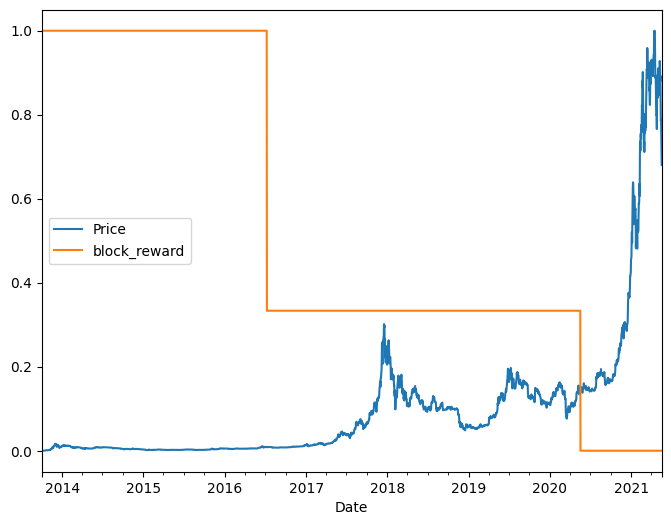

In [113]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(8, 6));

## Creating windowed dataset with pandas

We can use the `pandas.DataFrame.shift()` method to window our multivariate data: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [114]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [115]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [116]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [117]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [118]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [119]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [120]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100


 1/18 [>.............................] - ETA: 10s - loss: 3635.8716

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 69ms/step - loss: 1685.4146 - val_loss: 1470.3976
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 381.1053 - val_loss: 2004.3597
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 268.2024

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 235.2431 - val_loss: 1283.2990
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 251.5598

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 197.2605 - val_loss: 1102.3229
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 177.0833

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 43ms/step - loss: 190.1395 - val_loss: 1076.0542
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 142.2796

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 41ms/step - loss: 184.4539 - val_loss: 1009.3810
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 224.7902

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 173.9542 - val_loss: 1002.9766
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 146.5564

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 167.7775 - val_loss: 925.3348
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 166.3707 - val_loss: 934.0840
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 172.3790

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 160.1913 - val_loss: 877.7228
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 163.6279

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 59ms/step - loss: 153.8213 - val_loss: 864.1002
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 146.1446

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 149.8130 - val_loss: 847.2493
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 152.2948 - val_loss: 922.4344
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 148.6894 - val_loss: 874.9470
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 149.9101

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 41ms/step - loss: 144.4715 - val_loss: 781.5367
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2752 - val_loss: 793.9263
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6807

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 71ms/step - loss: 138.3251 - val_loss: 780.1854
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 137.5900 - val_loss: 787.3877
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 83.4863

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 134.4131 - val_loss: 775.0167
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5203

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 41ms/step - loss: 131.9530 - val_loss: 724.8998
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 179.3026

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 132.5142 - val_loss: 714.4163
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 182.2440

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 129.2806 - val_loss: 701.8870
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 131.8820 - val_loss: 732.8408
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 126.9648 - val_loss: 712.3999
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 145.1590

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 124.9950 - val_loss: 679.2480
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 129.3663 - val_loss: 683.8020
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 177.5155

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 125.7859 - val_loss: 677.2197
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 108.8472

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 122.7125 - val_loss: 658.3293
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 116.7826

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 57ms/step - loss: 121.3963 - val_loss: 652.3940
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8776

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 123.1423 - val_loss: 645.6033
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9511 - val_loss: 710.4636
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6917

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 124.1493 - val_loss: 636.2528
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 119.2307 - val_loss: 640.9399
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4927

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 118.2319 - val_loss: 629.6124
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 108.7102

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 116.1411 - val_loss: 628.2808
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 118.4722 - val_loss: 633.6323
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.9539

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 116.9058 - val_loss: 616.7260
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2943 - val_loss: 640.2968
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0855

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 77ms/step - loss: 117.0191 - val_loss: 608.5469
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 108.6071

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 113.2408 - val_loss: 606.0296
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3830 - val_loss: 625.7205
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1196 - val_loss: 640.1375
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7611 - val_loss: 628.9731
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 68.9268

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 113.6849 - val_loss: 595.8172
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4381 - val_loss: 598.2141
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 85.8679

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 54ms/step - loss: 112.7073 - val_loss: 591.8697
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2849 - val_loss: 601.8818
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4784 - val_loss: 692.8913
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 119.6602 - val_loss: 597.1175
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1991 - val_loss: 650.3185
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0898 - val_loss: 613.8002
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7243 - val_loss: 608.6671
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7106 - val_loss: 655.9105
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 109.4554

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 112.6396 - val_loss: 582.3833
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9908 - val_loss: 626.7588
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9782 - val_loss: 744.8947
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 123.7315 - val_loss: 694.1884
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1155 - val_loss: 625.2076
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9287 - val_loss: 603.2493
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2929 - val_loss: 635.5284
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0585

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 69ms/step - loss: 108.9237 - val_loss: 579.9606
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2029 - val_loss: 623.7681
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5047 - val_loss: 633.8768
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5436 - val_loss: 770.8972
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3348 - val_loss: 593.6994
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9322 - val_loss: 586.7453
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8179 - val_loss: 628.4061
Epoch 68/100
18/18 [==============================] - 0s 12ms/step - loss: 118.0104 - val_loss: 795.1917
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 130.5524 - val_loss: 700.9803
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 107.7828 - val_loss: 570.7407
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9128 - val_loss: 581.3211
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7129 - val_loss: 571.5999
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.9590 - val_loss: 589.0115
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6288 - val_loss: 634.0894
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5285 - val_loss: 608.3570
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 118.4316 - val_loss: 658.3813
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1848 - val_loss: 688.9180
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7945

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 112.0508 - val_loss: 570.1887
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5978 - val_loss: 584.5796
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7437 - val_loss: 578.4681
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5220 - val_loss: 591.3287
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8947 - val_loss: 571.4058
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 105.0852

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 106.2897 - val_loss: 569.6270
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 104.9267 - val_loss: 597.5836
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3801 - val_loss: 655.7583
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4086 - val_loss: 574.0222
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2777 - val_loss: 579.6207
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5158 - val_loss: 570.6935
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 104.8995 - val_loss: 571.3097
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6538 - val_loss: 683.8536
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9402 - val_loss: 578.9720
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 10

In [121]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

 1/18 [>.............................] - ETA: 0s - loss: 181.4621

18/18 [==============================] - 0s 2ms/step - loss: 693.0212


693.0211791992188

In [122]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 569.6271


569.6270751953125

In [123]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8812.934, 8772.121, 9028.665, 8699.742, 8718.212, 8751.989,
       8623.573, 8506.712, 8440.054, 8510.292], dtype=float32)>

In [124]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 569.6271,
 'mse': 1161540.5,
 'rmse': 1077.7479,
 'mape': 2.5634258,
 'mase': 1.000677}

## Model 7: N-BEATS algorithm

It's a univariate time series point forecasting model.

We are replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf


* It will help us to see how to use TensorFlow layer subclassing (to make our own custom layers)
* To get experience using the Functional API to create a custom architecture 

### Building and testing the N-BEATS block layer

Since the N-BEATS block layer doesn't exist in TensorFlow, We need to build it.

**NOTE:** To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [125]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Testing NBeatsBlock class.

We will use some dummy inputs and outputs.

In [126]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [131]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [132]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.63895464 -0.19089022 -0.20289345 -0.79625183 -0.61043555  0.11434553
  0.3744382 ]
Forecast: -0.5431811213493347


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible, We are using the performant data pipeline: https://www.tensorflow.org/guide/data_performance 

In [133]:
WINDOW_SIZE = 7
HORIZON = 1

In [134]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [135]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [140]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [141]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024 # batch_size according to the paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf 

In [142]:
# Values from N-BEATS paper (Hyperparameters values) 
N_EPOCHS = 5000 #Iterations
N_NEURONS = 512 #Width
N_LAYERS = 4    #Block-layers
N_STACKS = 30   #Stacks

INPUT_SIZE = WINDOW_SIZE * HORIZON #Lookback period
THETA_SIZE = INPUT_SIZE + HORIZON  #backcast + forecast

INPUT_SIZE, THETA_SIZE

(7, 8)

### Building residual connections (Double residual stacking)

We need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections: https://en.wikipedia.org/wiki/Residual_neural_network

Also, Here: https://paperswithcode.com/method/resnet

In [143]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract the tensors
subtracted = layers.subtract([tensor_1, tensor_2])

# Add the tensors
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Added: {added.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Added: [10 12 14 16 18 20 22 24 26 28]
Subtracted: [10 10 10 10 10 10 10 10 10 10]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this is the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (Using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (Step 1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (Step 4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we will use MAE to keep it inline with other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we will use a couple of callbacks: 
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance) 

In [144]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created above

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# NOTE: Since early stopping is used and it will stop when the model stops improving, hence we have not used ModelCheckpoint
# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 812: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1256: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1356: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: total: 9h 59min 5s
Wall time: 2h 6min 46s


In [145]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 401ms/step - loss: 568.6066


568.6065673828125

In [146]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8822.798, 8784.861, 9045.683, 8763.45 , 8770.794, 8759.266,
       8642.72 , 8516.105, 8471.14 , 8520.363], dtype=float32)>

In [147]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 568.60657,
 'mse': 1156123.9,
 'rmse': 1075.232,
 'mape': 2.595431,
 'mase': 0.99888426}

The `N-BEATS model` doesn't perform as well as `model_1` or the `original naive forecast`.

### Plotting the N-BEATS architecture

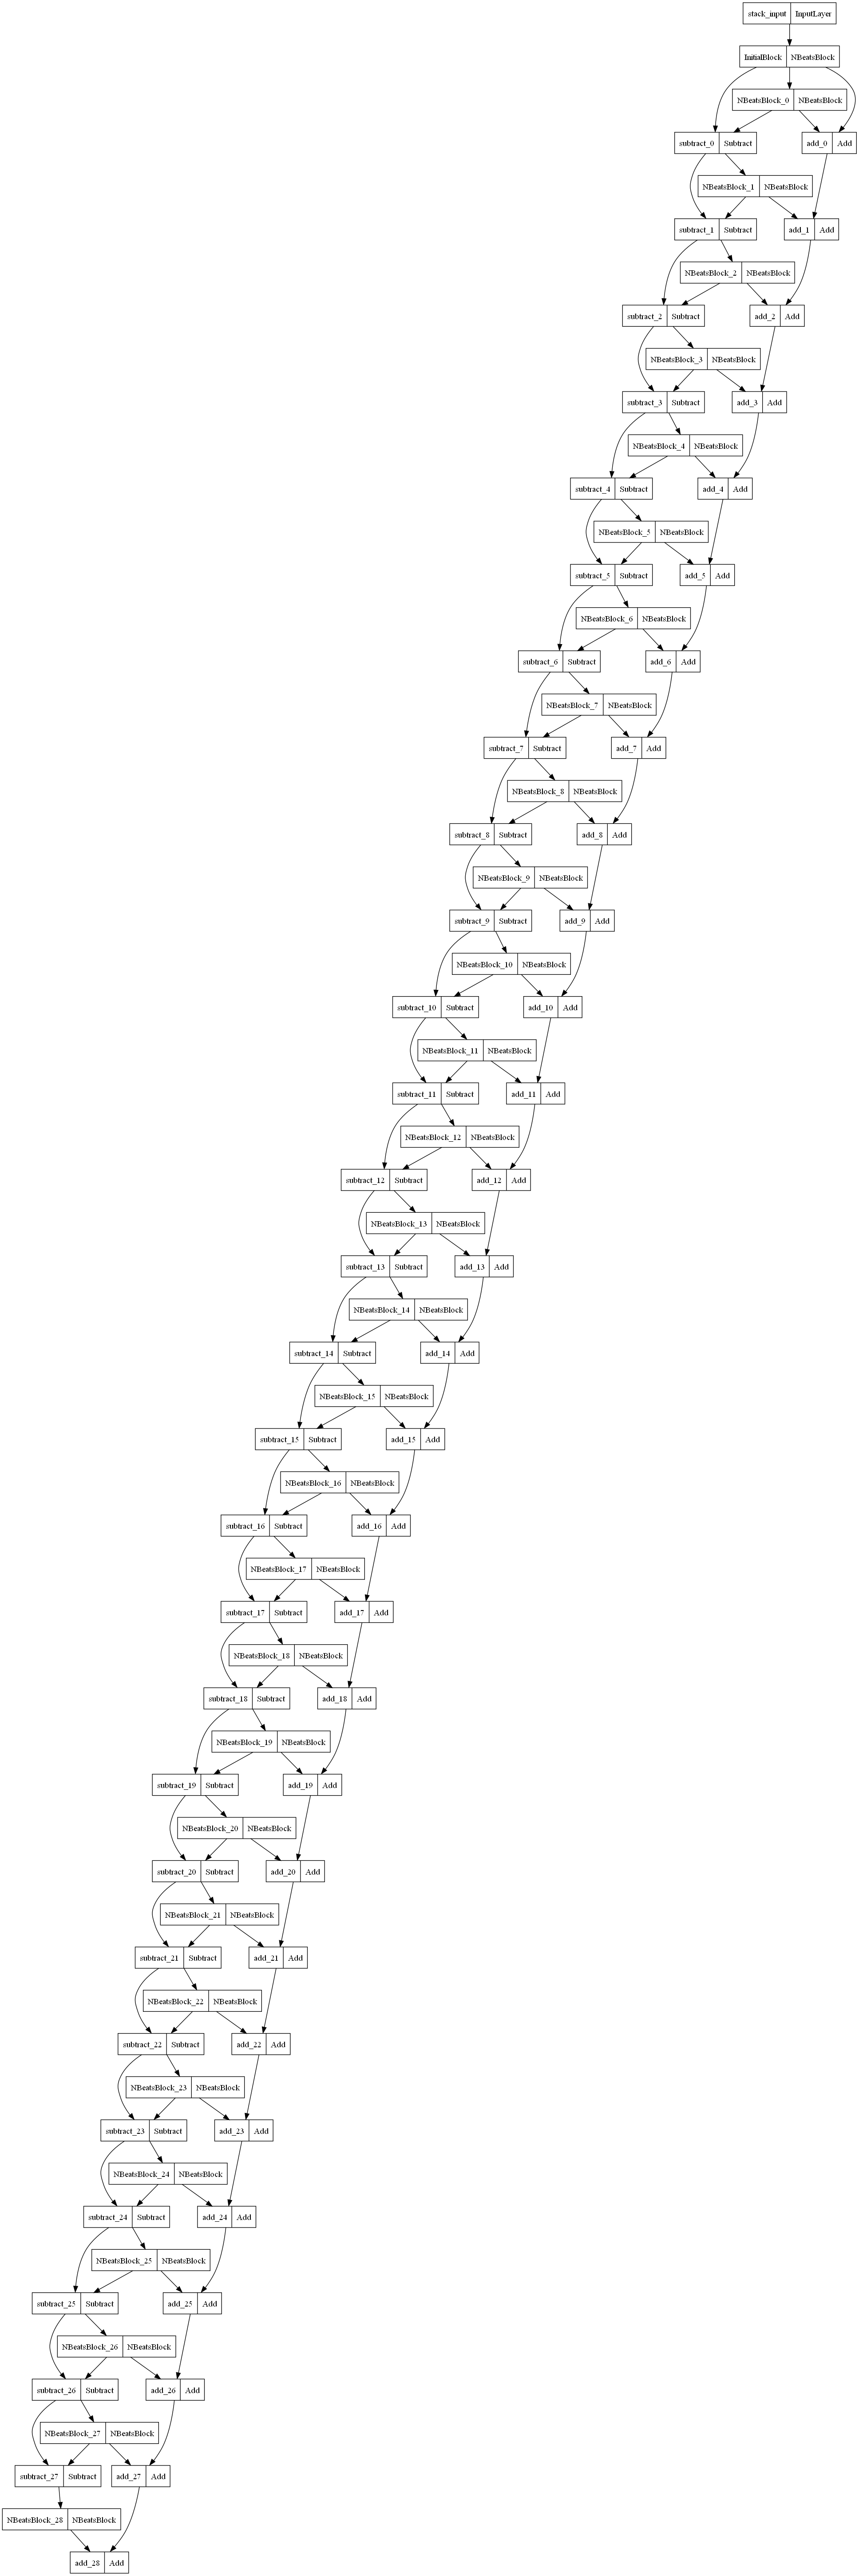

In [148]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

It combines many *different* models to predict a common goal.

In [149]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [150]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

In [151]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 882: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 982: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 494: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 594: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 260: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 818: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 281: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 531: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 631: ReduceLROnPl

### Predicting with ensemble model

In [153]:
ensemble_models

In [154]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [157]:
%%time
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 81ms/step
CPU times: total: 2.44 s
Wall time: 4.58 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8816.118 ,  8751.884 ,  9063.962 , ..., 49822.23  , 48466.633 ,
        45355.035 ],
       [ 8744.985 ,  8763.905 ,  9058.819 , ..., 50144.246 , 47714.684 ,
        45931.746 ],
       [ 8792.4795,  8802.534 ,  9092.271 , ..., 50042.58  , 49011.797 ,
        46127.26  ],
       ...,
       [ 8772.63  ,  8731.125 ,  9062.003 , ..., 49850.97  , 49114.125 ,
        46513.    ],
       [ 8796.818 ,  8765.207 ,  8981.451 , ..., 49119.14  , 48303.086 ,
        46817.715 ],
       [ 8818.935 ,  8746.844 ,  9067.256 , ..., 50104.125 , 49136.234 ,
        46328.64  ]], dtype=float32)>

In [158]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8816.118 ,  8751.884 ,  9063.962 , ..., 49822.23  , 48466.633 ,
        45355.035 ],
       [ 8744.985 ,  8763.905 ,  9058.819 , ..., 50144.246 , 47714.684 ,
        45931.746 ],
       [ 8792.4795,  8802.534 ,  9092.271 , ..., 50042.58  , 49011.797 ,
        46127.26  ],
       ...,
       [ 8772.63  ,  8731.125 ,  9062.003 , ..., 49850.97  , 49114.125 ,
        46513.    ],
       [ 8796.818 ,  8765.207 ,  8981.451 , ..., 49119.14  , 48303.086 ,
        46817.715 ],
       [ 8818.935 ,  8746.844 ,  9067.256 , ..., 50104.125 , 49136.234 ,
        46328.64  ]], dtype=float32)>

The ensemble_preds come out in multiple dimensions but to combine into **point predictions** we can use the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [159]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8782.339, 8769.472, 9067.448, 8731.575, 8733.835, 8727.169,
       8657.261, 8477.723, 8450.981, 8520.377], dtype=float32)>

In [160]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8784.713, 8765.207, 9075.637, 8723.194, 8753.648, 8741.612,
       8653.737, 8489.001, 8452.514, 8529.778], dtype=float32)

In [163]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 582.3211,
 'mse': 1188233.2,
 'rmse': 1089.9575,
 'mape': 2.640142,
 'mase': 1.0229769}

In [164]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 571.6914,
 'mse': 1155954.9,
 'rmse': 1075.1534,
 'mape': 2.582723,
 'mase': 1.0043035}

In [165]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 569.7683,
 'mse': 1153006.8,
 'rmse': 1073.7815,
 'mape': 2.5687532,
 'mase': 1.0009251}